# Estrutura Cristalina do Cu usando VASP e ASE

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

Importando variáveis do VASP

In [ ]:
import os
# Definindo o path para os arquivos de potencial de pseudopotenciais do VASP
# Certifique-se de que o caminho esteja correto para o seu sistema
os.environ['VASP_PP_PATH'] = '/home/elvis/Programs/vasp.6.5.1/pp'
os.environ['ASE_VASP_COMMAND'] = 'mpirun -np 1 vasp_std_gpu'
os.environ['NO_STOP_MESSAGE'] = '1' # to avoid warning from mpirun

# Importando o VASP calculator do ASE
from ase.calculators.vasp import Vasp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ase import Atom, Atoms
from ase.io import read, write
from ase.visualize import view

Criando rede a partir da definição de célula primitiva FCC

In [3]:
a = 2.53
atoms = Atoms([Atom("Cu", (0, 0, 0))],
                cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                [0.0, 1.0, 1.0],
                [1.0, 0.0, 1.0]]), pbc=True)

print(atoms)
print("Cell:", atoms.get_cell())
print("Positions:\n", atoms.get_positions())

Atoms(symbols='Cu', pbc=True, cell=[[1.265, 1.265, 0.0], [0.0, 1.265, 1.265], [1.265, 0.0, 1.265]])
Cell: Cell([[1.265, 1.265, 0.0], [0.0, 1.265, 1.265], [1.265, 0.0, 1.265]])
Positions:
 [[0. 0. 0.]]


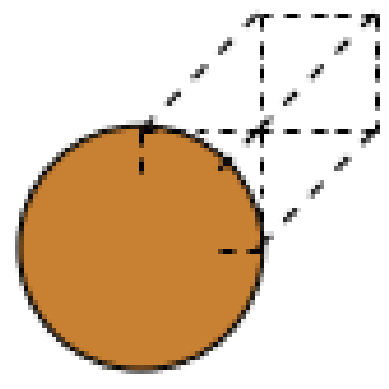

In [4]:
write('Cu-fcc-primitive.png', atoms, show_unit_cell=2)

img = plt.imread('Cu-fcc-primitive.png')
plt.imshow(img)
plt.axis('off')  # no axes
plt.show()

A partir de arquivo CIF

In [5]:
# Read CIF file
atoms = read('Cu_conventional.cif')

# See basic info
print(atoms)
print("Cell:", atoms.get_cell())
print("Positions:\n", atoms.get_positions())

atoms.get_number_of_atoms()

Atoms(symbols='Cu4', pbc=True, cell=[3.621262, 3.621262, 3.621262], spacegroup_kinds=...)
Cell: Cell([3.621262, 3.621262, 3.621262])
Positions:
 [[0.       0.       0.      ]
 [0.       1.810631 1.810631]
 [1.810631 0.       1.810631]
 [1.810631 1.810631 0.      ]]


/tmp/ipykernel_443557/340528328.py:9: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  atoms.get_number_of_atoms()


4

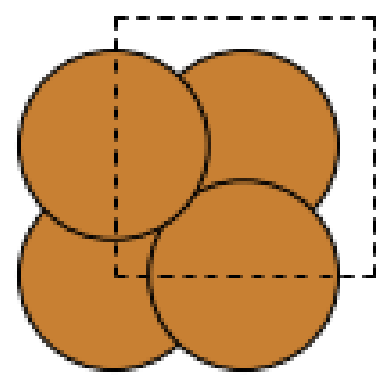

In [6]:
write('Cu-fcc-conventional.png', atoms, show_unit_cell=2)

img = plt.imread('Cu-fcc-conventional.png')
plt.imshow(img)
plt.axis('off')  # no axes
plt.show()

In [7]:
calc = Vasp(directory='Cu_bulk',
                xc='PBE',
                kpts=[8, 8, 8],  # specifies k-points
                encut=350,
                atoms=atoms)

In [8]:
atoms.get_potential_energy()

-14.94244036

Variando o parâmetro `ENCUT`

In [ ]:
ENCUTS = [250, 300, 350, 400, 450, 500]

TE0 = []
for ecut in ENCUTS:
    calc = Vasp(directory='Cu_bulk/encut-{0}'.format(ecut),
                xc='PBE',
                kpts=[6, 6, 6],  # specifies k-points
                encut=ecut,
                atoms=atoms)
    TE0.append(atoms.get_potential_energy())
if None in TE0:
    calc.abort()
import matplotlib.pyplot as plt
# consider the change in energy from lowest energy state
TE0 = np.array(TE0)
TE0 -= TE0.min()

Text(0, 0.5, 'Total Energy (eV)')

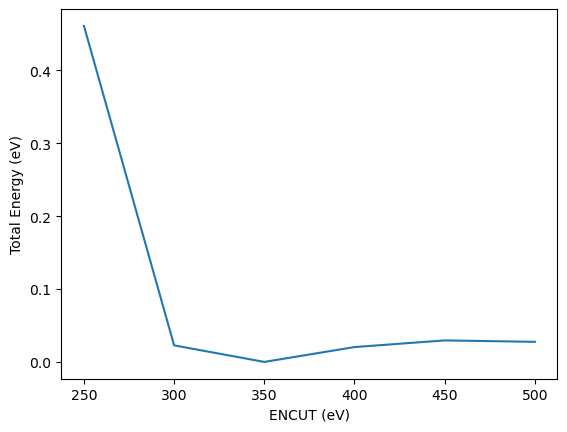

In [10]:
plt.plot(ENCUTS, TE0)
plt.xlabel('ENCUT (eV)')
plt.ylabel('Total Energy (eV)')
# plt.ylim(0,2.5)
# plt.savefig('images/Cu-encut-convergence.png')

Variando o número de pontos k

In [11]:
KPTS = [2, 3, 4, 5, 6, 8, 10]
TE = []
for k in KPTS:
    calc = Vasp(directory='Cu_bulk/kpts-{0}'.format(k),
                xc='PBE',
                kpts=[k, k, k],  # specifies k-points
                encut=350,
                atoms=atoms)
    TE.append(atoms.get_potential_energy())
if None in TE:
    calc.abort()
import matplotlib.pyplot as plt
# consider the change in energy from lowest energy state
TE = np.array(TE)
TE -= TE.min()

(0.0, 0.1)

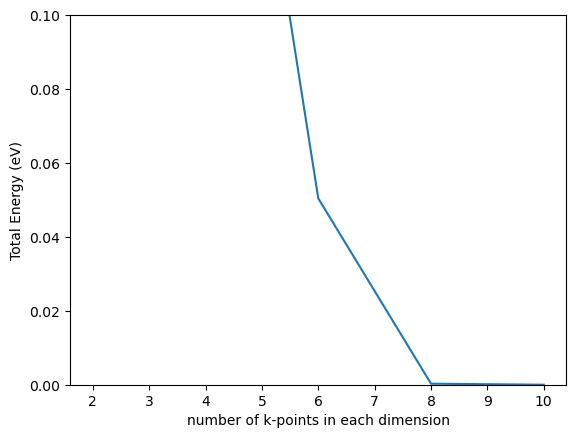

In [13]:
plt.plot(KPTS, TE)
plt.xlabel('number of k-points in each dimension')
plt.ylabel('Total Energy (eV)')
plt.ylim(0,0.1)
# plt.savefig('images/Cu-kpt-convergence.png')

Testando a velocidade

In [14]:
calc = Vasp(directory='Cu_bulk',
                xc='PBE',
                kpts=[6, 6, 6],  # specifies k-points
                encut=350,
                atoms=atoms)

atoms.get_potential_energy()

-14.89230111

In [15]:
calc = Vasp(directory='Cu_bulk',
                xc='PBE',
                kpts=[8, 8, 8],  # specifies k-points
                encut=350,
                atoms=atoms)

atoms.get_potential_energy()

-14.94243622

Criando supercélula

In [9]:
supercell = atoms.repeat((2, 2, 2))

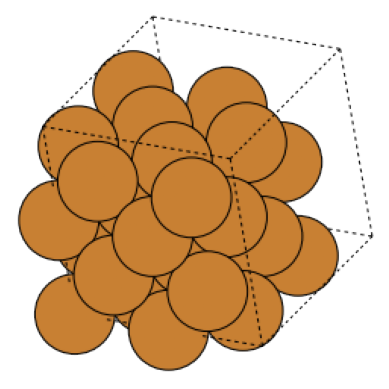

In [10]:
write('Cu-fcc-supercell-2x2x2.png', supercell, show_unit_cell=2, rotation="45x,45y,45z")

img = plt.imread('Cu-fcc-supercell-2x2x2.png')
plt.imshow(img)
plt.axis('off')  # no axes
plt.show()

In [11]:
calc = Vasp(directory='Cu_bulk',
                xc='PBE',
                kpts=[6, 6, 6],  # specifies k-points
                encut=350,
                atoms=supercell)

supercell.get_potential_energy()

KeyboardInterrupt: 